In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(r"C:\Users\91994\Downloads\DS1_C8_Computers_Data_Project.csv")

In [4]:
df.isnull().sum()

index       0
price       0
speed       0
hd          0
ram         0
screen      0
cd          0
multi       0
premium     0
ads_2022    0
ads_2023    0
trend       0
dtype: int64

In [ ]:
#Business Objective 1

#Enhance Product Strategy and Sales Performance through Specification-Based Analysis

In [ ]:
#Task 1

#a) Analyze Purchase Likelihood Based on Specifications

#The company wants to understand the likelihood of customers purchasing specific computer configurations based on a combination of desired features (RAM size, processor speed, size of the computer screen).

#What is the probability of a customer purchasing a computer with at least 8GB of RAM, computer screen size of 14 inch, and a processor speed exceeding 33 MHz?

In [8]:
# Filter for specified configurations
filtered_data = df[(df['ram'] >= 8) & (df['screen'] == 14) & (df['speed'] > 33)]

# Checking the count of filtered rows
n_specified = len(filtered_data)
print(f"Number of computers with specified configurations: {n_specified}")

Number of computers with specified configurations: 1003


In [9]:
# Total number of computers in the dataset
n_total = len(df)

# Calculating probability
probability = n_specified / n_total

# Output the results
print(f"Total computers: {n_total}")
print(f"Probability of purchase with specified configurations: {probability:.2f}")

Total computers: 6259
Probability of purchase with specified configurations: 0.16


In [ ]:
#Task 1 (cont'd)

#b) Probability of Selling Premium Computers

#I. What is the probability of selling a premium computer?

#II. Given that a computer is premium, what is the probability that it has a CD player?


In [10]:
# Total computers and premium computers
n_total = len(df)
n_premium = len(df[df['premium'] == 'yes'])

# Probability
p_premium = n_premium / n_total
print(f"Probability of selling a premium computer: {p_premium:.2f}")

Probability of selling a premium computer: 0.90


In [12]:
# Filter premium computers
premium_computers = df[df['premium'] == 'yes']

# Count premium computers with a CD player
n_premium_with_cd = len(premium_computers[premium_computers['cd'] == 'yes'])

# Conditional probability
p_cd_given_premium = n_premium_with_cd / n_premium
print(f"Probability of a premium computer having a CD player: {p_cd_given_premium:.2f}")

Probability of a premium computer having a CD player: 0.50


In [ ]:
#Task 1 (cont'd)

#c) Predicting the Probability of Certain Specifications

#What is the probability of a computer having a screen size greater than 15 inches and being premium?

#Given that a computer is not premium, what is the probability that it has a screen size less than or equal to 14 inches?

In [13]:
# Total number of computers
n_total = len(df)

# Computers with screen > 15 and premium
n_screen_premium = len(df[(df['screen'] > 15) & (df['premium'] == 'yes')])

# Probability
p_screen_and_premium = n_screen_premium / n_total
print(f"Probability of screen > 15 inches and being premium: {p_screen_and_premium:.2f}")

Probability of screen > 15 inches and being premium: 0.08


In [14]:
# Filter for non-premium computers
non_premium_computers = df[df['premium'] == 'no']

# Total non-premium computers
n_non_premium = len(non_premium_computers)

# Non-premium computers with screen ≤ 14
n_screen_non_premium = len(non_premium_computers[non_premium_computers['screen'] <= 14])

# Conditional probability
p_screen_given_non_premium = n_screen_non_premium / n_non_premium
print(f"Probability of screen ≤ 14 inches given not premium: {p_screen_given_non_premium:.2f}")

Probability of screen ≤ 14 inches given not premium: 0.69


In [ ]:
#Task 1 (cont'd)

#d) Likelihood of computers having both a CD player and a multimedia kit

#i What is the joint probability of computers having both a CD player and a multimedia kit?

#ii. Given that a computer has a CD player, what is the probability that it also has a multimedia kit?

In [16]:
# Total number of computers
n_total = len(df)

# Computers with both CD player and multimedia kit
n_cd_and_multi = len(df[(df['cd'] == 'yes') & (df['multi'] == 'yes')])

# Joint probability
p_cd_and_multi = n_cd_and_multi / n_total
print(f"Joint probability of having both a CD player and a multimedia kit: {p_cd_and_multi:.2f}")

Joint probability of having both a CD player and a multimedia kit: 0.14


In [17]:
# Filter for computers with a CD player
cd_computers = df[df['cd'] == 'yes']

# Total computers with a CD player
n_cd = len(cd_computers)

# Computers with both CD player and multimedia kit
n_multi_given_cd = len(cd_computers[cd_computers['multi'] == 'yes'])

# Conditional probability
p_multi_given_cd = n_multi_given_cd / n_cd
print(f"Probability of having a multimedia kit given a CD player: {p_multi_given_cd:.2f}")


Probability of having a multimedia kit given a CD player: 0.30


In [ ]:
#Business Objective 2

#Assessing Price Disparities Between Premium and Non- Premium Computers as compared to prices of both categories together.

In [ ]:
#Task 2

#a) What is the average price of computers in the population/whole data?


In [18]:
# Calculate the average price of all computers
avg_price_population = df['price'].mean()

print(f"Average price of computers in the dataset: ${avg_price_population:.2f}")

Average price of computers in the dataset: $2219.58


In [ ]:
# b) How does the average price of samples vary when data is sampled using different sampling techniques?

In [19]:
# Simple random sampling
sample_random = df.sample(n=30, random_state=42)
avg_price_random = sample_random['price'].mean()
print(f"Simple Random Sampling Avg Price: ${avg_price_random:.2f}")

Simple Random Sampling Avg Price: $2223.37


In [20]:
# Split data into groups
premium = df[df['premium'] == 'yes']
non_premium = df[df['premium'] == 'no']

# Proportional sample sizes (e.g., 70% premium, 30% non-premium)
sample_premium = premium.sample(n=21, random_state=42)  # 70% of 30
sample_non_premium = non_premium.sample(n=9, random_state=42)  # 30% of 30

# Combine and calculate average
sample_stratified = pd.concat([sample_premium, sample_non_premium])
avg_price_stratified = sample_stratified['price'].mean()
print(f"Stratified Sampling Avg Price: ${avg_price_stratified:.2f}")

Stratified Sampling Avg Price: $2193.10


In [21]:
# Systematic sampling (e.g., every 10th record)
k = 10
sample_systematic = df.iloc[::k]
avg_price_systematic = sample_systematic['price'].mean()
print(f"Systematic Sampling Avg Price: ${avg_price_systematic:.2f}")

Systematic Sampling Avg Price: $2220.65


In [ ]:
#Task 2 (cont'd)

#c) What is the average price of premium and non-premium computers in the whole data? How does the average price differ between premium and non-premium computers of sampled data using simple random sampling without replacement?

In [22]:
# Average price for premium computers
avg_price_premium = df[df['premium'] == 'yes']['price'].mean()

# Average price for non-premium computers
avg_price_non_premium = df[df['premium'] == 'no']['price'].mean()

print(f"Average price of premium computers: ${avg_price_premium:.2f}")
print(f"Average price of non-premium computers: ${avg_price_non_premium:.2f}")

Average price of premium computers: $2204.15
Average price of non-premium computers: $2361.93


In [23]:
# Simple random sampling without replacement
sample_random = df.sample(n=30, random_state=42)

# Average price for premium and non-premium computers in the sample
avg_price_premium_sample = sample_random[sample_random['premium'] == 'yes']['price'].mean()
avg_price_non_premium_sample = sample_random[sample_random['premium'] == 'no']['price'].mean()

print(f"Sampled Premium Computers Avg Price: ${avg_price_premium_sample:.2f}")
print(f"Sampled Non-Premium Computers Avg Price: ${avg_price_non_premium_sample:.2f}")

Sampled Premium Computers Avg Price: $2225.86
Sampled Non-Premium Computers Avg Price: $2188.50


In [ ]:
#d) Write your interpretation by comparing prices of premium and non-premium computers individually and prices of both categories together.

In [ ]:
#Premium Computers:
#Whole Data: $2,204.15
#Sampled Data: $2,225.86
#Premium computers are priced lower than non-premium ones, with minimal price difference between the whole dataset and the sample.

#Non-Premium Computers:
#Whole Data: $2,361.93
#Sampled Data: $2,188.50
#Non-premium computers are more expensive on average in the whole dataset, but the sample shows them to be cheaper than premium models.

#Combined Price:
#Whole Data: Non-premium computers pull the overall average higher due to their higher prices.
#Sampled Data: The price gap between premium and non-premium computers is smaller in the sample, showing random selection may not reflect the true price distribution.

In [ ]:
#Business Objective 3

#Understanding Computer Price Trends Through Distribution Analysis

In [ ]:
#Task 3

#a) How does the distribution of sample means change for computer prices with different sample sizes?

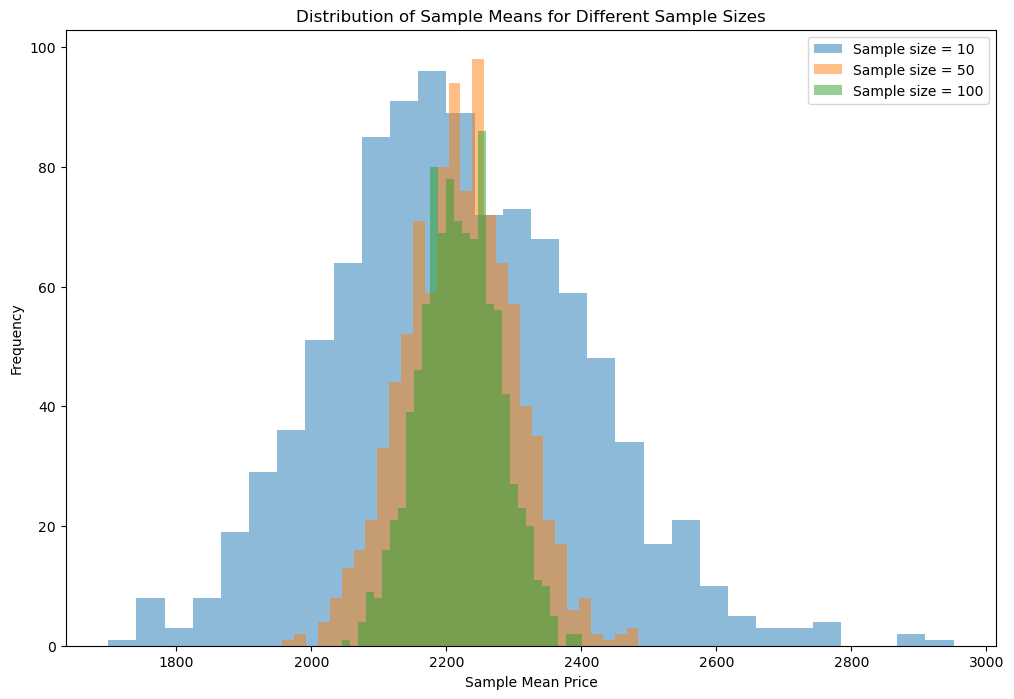

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Function to take samples and calculate their means
def sample_distribution(df, sample_sizes, num_samples=1000):
    sample_means = {}
    for size in sample_sizes:
        means = [df.sample(n=size)['price'].mean() for _ in range(num_samples)]
        sample_means[size] = means
    return sample_means

# Define sample sizes (e.g., 10, 50, 100)
sample_sizes = [10, 50, 100]

# Get the sample means
sample_means = sample_distribution(df, sample_sizes)

# Plot the distributions of sample means for different sample sizes
plt.figure(figsize=(12, 8))
for size, means in sample_means.items():
    plt.hist(means, bins=30, alpha=0.5, label=f'Sample size = {size}')
    
plt.title('Distribution of Sample Means for Different Sample Sizes')
plt.xlabel('Sample Mean Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
# b) Does the distribution of sample means approximate a normal distribution as sample size increases?

In [ ]:
#Yes, the distribution of sample means approximates a normal distribution as the sample size increases. 
#This is a fundamental principle in statistics, known as the Central Limit Theorem (CLT).

In [ ]:
# c) Check if properties of Central limit theorem for the samples is satisfied.

In [26]:
import scipy.stats as stats

# Shapiro-Wilk test for normality on larger sample size
sample_mean_large = sample_means[100]  # Sample means from size 100

# Perform Shapiro-Wilk test
stat, p_value = stats.shapiro(sample_mean_large)

# Print test statistic and p-value
print(f"Shapiro-Wilk Test Stat: {stat}, P-Value: {p_value}")

# Interpreting the result based on p-value
if p_value > 0.05:
    print("Fail to reject the null hypothesis: The sample means are normally distributed.")
else:
    print("Reject the null hypothesis: The sample means are not normally distributed.")

Shapiro-Wilk Test Stat: 0.9984093428521674, P-Value: 0.49683298445182417
Fail to reject the null hypothesis: The sample means are normally distributed.
